In [1]:
!wget https://cdn.pixabay.com/photo/2017/08/30/12/45/girl-2696947_1280.jpg
!mv girl-2696947_1280.jpg face.jpg

--2022-01-24 22:04:52--  https://cdn.pixabay.com/photo/2017/08/30/12/45/girl-2696947_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002706 (979K) [image/jpeg]
Saving to: ‘girl-2696947_1280.jpg’

girl-2696947_1280.j 100%[===================>] 979.21K  --.-KB/s    in 0.05s   

2022-01-24 22:04:53 (20.0 MB/s) - ‘girl-2696947_1280.jpg’ saved [1002706/1002706]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def fancy_pca(img, alpha_std=0.1):    
    orig_img = img.astype(float).copy()
    img = img / 255.0  
    img_rs = img.reshape(-1, 3)
    img_centered = img_rs - np.mean(img_rs, axis=0)

    #Obtain eigenvectors of three components
    img_cov = np.cov(img_centered, rowvar=False)
    eig_vals, eig_vecs = np.linalg.eigh(img_cov)

    # sort values and vector
    sort_perm = eig_vals[::-1].argsort()
    eig_vals[::-1].sort()
    eig_vecs = eig_vecs[:, sort_perm]

    # get [p1, p2, p3]
    m1 = np.column_stack((eig_vecs))      

    # eigenvalues with random scalars
    alpha = np.random.normal(0, alpha_std)
    m2 = np.zeros((3, 1))
    m2[:, 0] = alpha * eig_vals[:]

    # Addition vector by channel
    add_vect = np.matrix(m1) * np.matrix(m2)

    for idx in range(3):   # RGB
        orig_img[..., idx] += add_vect[idx]

    orig_img = np.clip(orig_img, 0.0, 255.0)
    orig_img = orig_img.astype(np.uint8)
    return orig_img

In [4]:
def random_scalars(img, alpha_std=0.1):    
    orig_img = img.astype(float).copy()

    # Addition vector by channel
    add_vect = np.random.normal(0, alpha_std, size=(3))

    for idx in range(3):   # RGB
        orig_img[..., idx] += add_vect[idx]

    orig_img = np.clip(orig_img, 0.0, 255.0)
    orig_img = orig_img.astype(np.uint8)
    return orig_img

In [5]:
def plot_i(img, new):
  plt.figure(figsize=(15,10))
  plt.subplot(1,3,1)
  plt.imshow(img)
  plt.title('Original')
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.imshow(new)
  plt.title('New')
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.imshow((img!=new).astype('uint8')*255)
  plt.title('Difference between images')
  plt.axis('off')

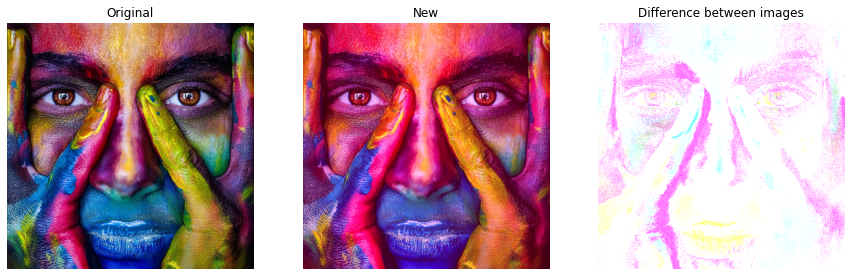

In [6]:
ima=cv2.cvtColor(cv2.imread('/content/face.jpg'), cv2.COLOR_RGB2BGR)
out=fancy_pca(ima, 1000)

plot_i(ima, out)

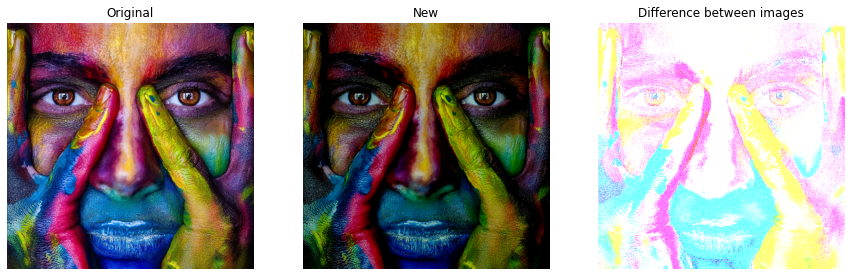

In [7]:
ima=cv2.cvtColor(cv2.imread('/content/face.jpg'), cv2.COLOR_RGB2BGR)
out=random_scalars(ima, 100)
plot_i(ima, out)